<IPython.core.display.Javascript object>


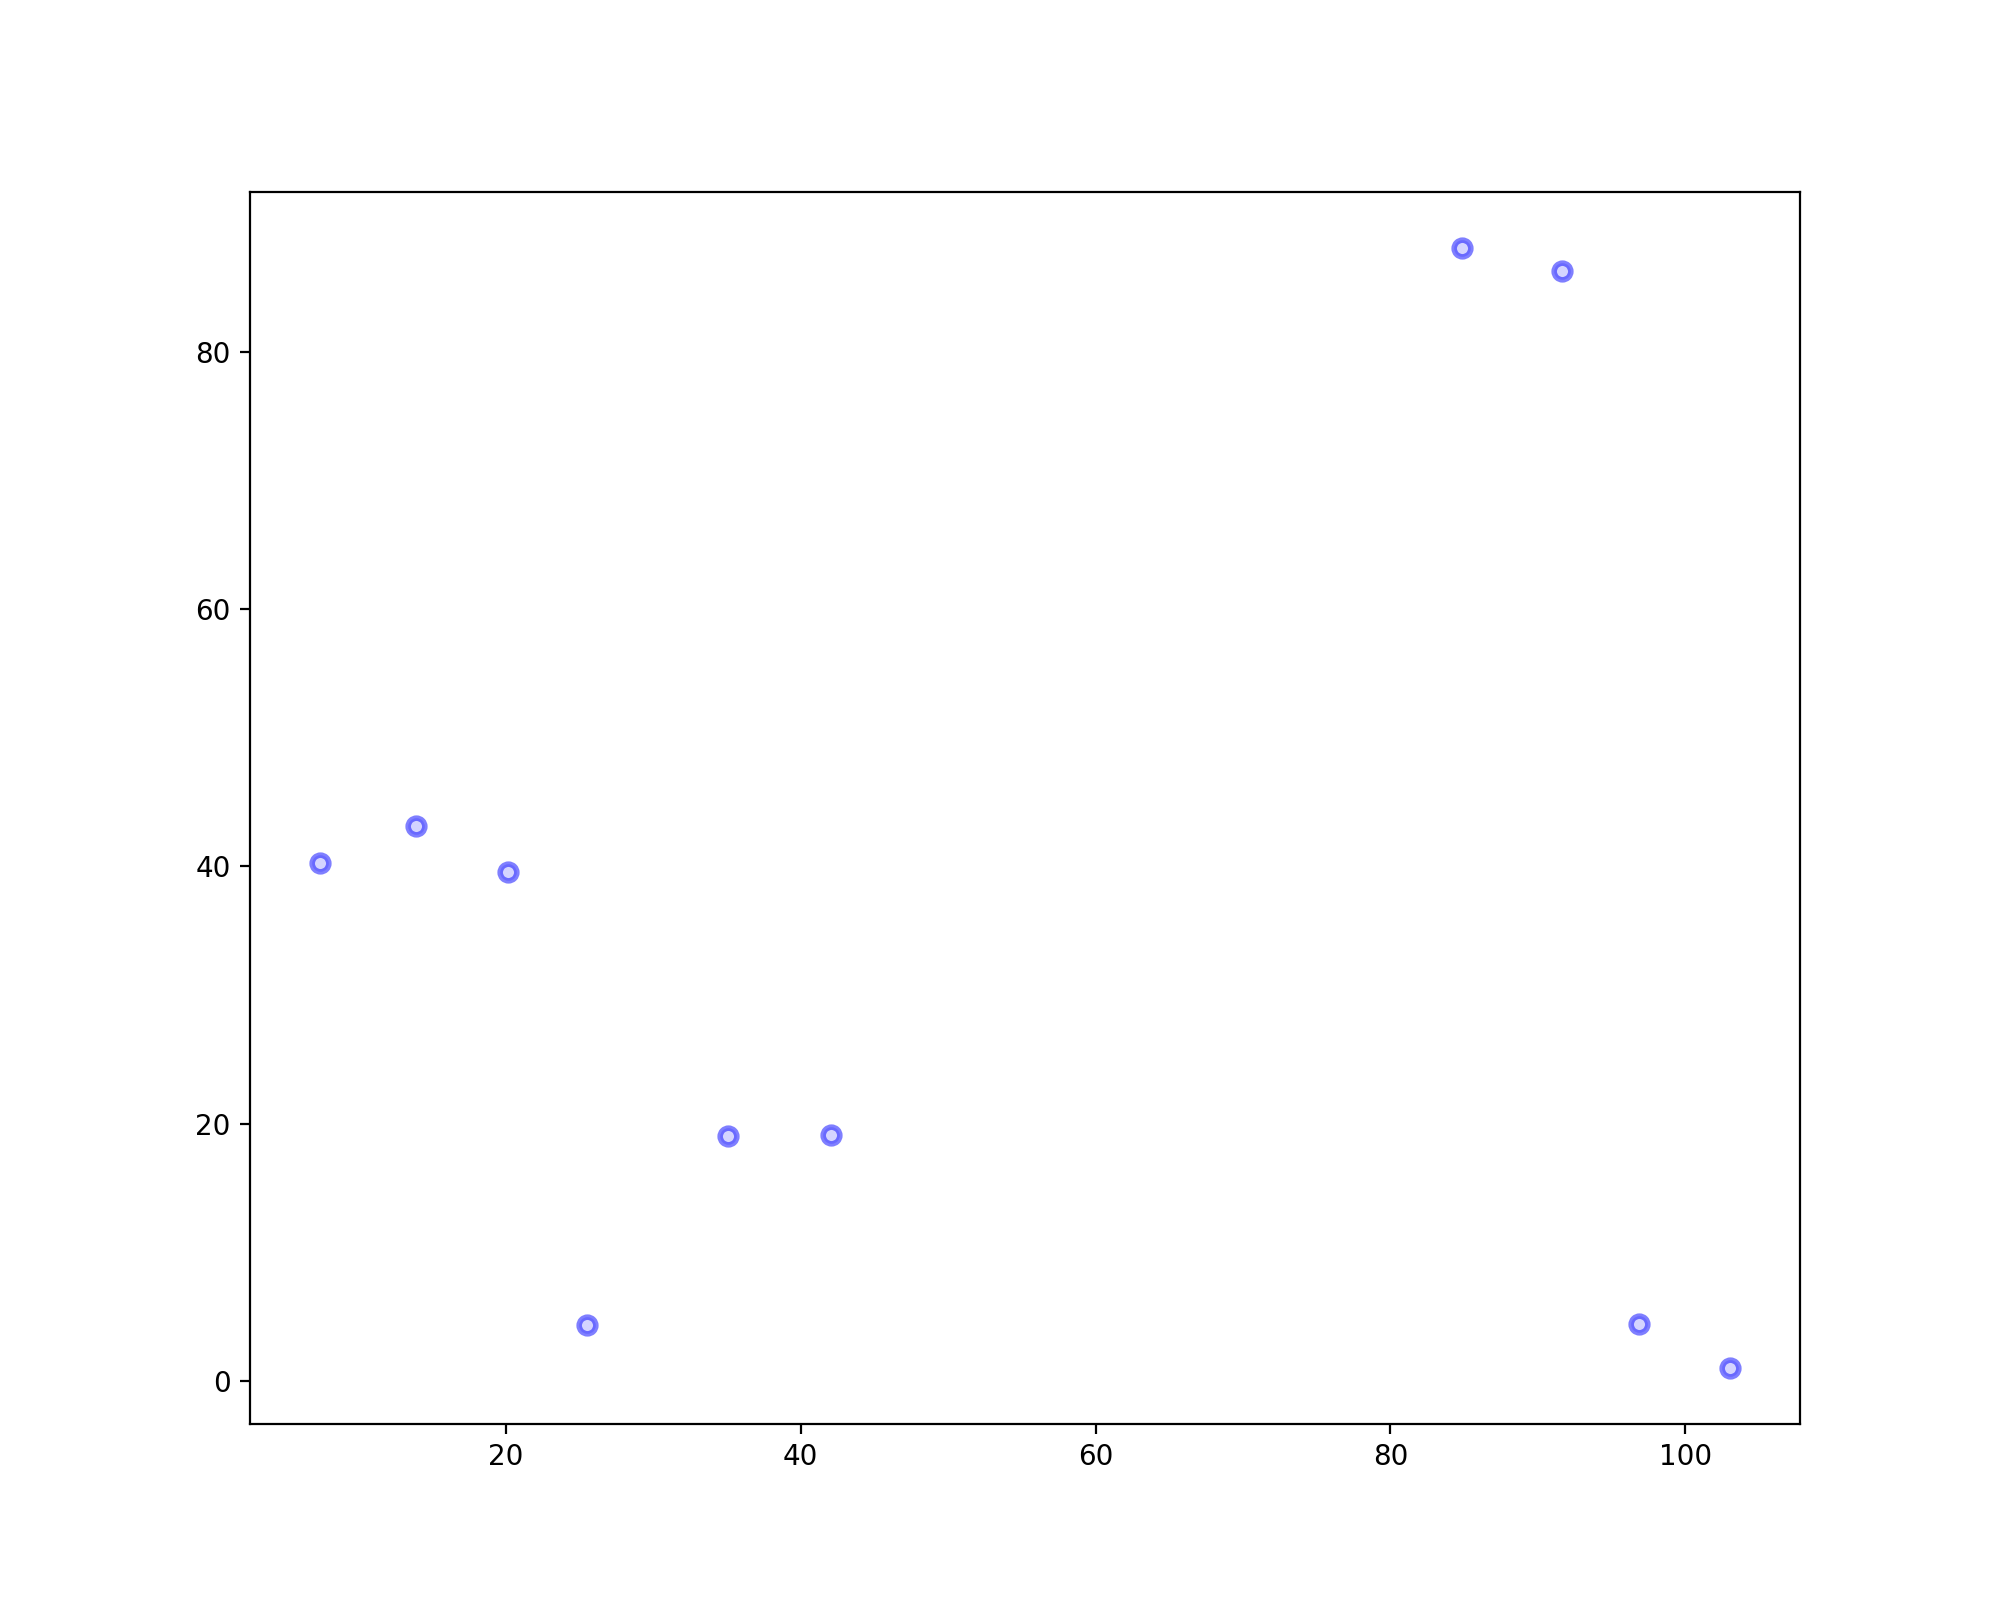

=====初期のグラフ======
0.0
2.0
=====初期のグラフ======
4.0
0.0
=====初期のグラフ======
10.0
0.0
=====初期のグラフ======
16.0
0.0
=====初期のグラフ======
14.0
6.0
=====初期のグラフ======
8.0
4.0
=====初期のグラフ======
2.0
6.0
=====初期のグラフ======
8.0
8.0
=====初期のグラフ======
11.0
10.0
=====初期のグラフ======
6.0
12.0
xArray [0.0, 4.0, 10.0, 16.0, 14.0, 8.0, 2.0, 8.0, 11.0, 6.0]
yArray [2.0, 0.0, 0.0, 0.0, 6.0, 4.0, 6.0, 8.0, 10.0, 12.0]


In [5]:
%matplotlib notebook
import matplotlib.pyplot as pyplot
import matplotlib.animation as animation
import numpy as np

## 10個のボイズの初期の単位ベクトル,np.arrayを使用
unitVector = {"v1":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v2":np.array([0,1]),"v3":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v4":np.array([-1/np.sqrt(2),1/np.sqrt(2)]),"v5":np.array([-1/np.sqrt(2),1/np.sqrt(2)]),"v6":np.array([-1/np.sqrt(2),1/np.sqrt(2)]),"v7":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v8":np.array([0,1]),"v9":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v10":np.array([-1/np.sqrt(2),1/np.sqrt(2)])}

##10個のボイズの初期の座標
coordinate = {"v1":np.array([0.0,2.0]),"v2":np.array([4.0,0.0]),"v3":np.array([10.0,0.0]),"v4":np.array([16.0,0.0]),"v5":np.array([14.0,6.0]),"v6":np.array([8.0,4.0]),"v7":np.array([2.0,6.0]),"v8":np.array([8.0,8.0]),"v9":np.array([11.0,10.0]),"v10":np.array([6.0,12.0])}

##条件2に応じて書き換えていく新たな座標.
newCoordinate = {"v1":np.array([0.0,2.0]),"v2":np.array([4.0,0.0]),"v3":np.array([10.0,0.0]),"v4":np.array([16.0,0.0]),"v5":np.array([14.0,6.0]),"v6":np.array([8.0,4.0]),"v7":np.array([2.0,6.0]),"v8":np.array([8.0,8.0]),"v9":np.array([11.0,10.0]),"v10":np.array([6.0,12.0])}

## 半径7以内に存在するボイズの一時的格納用　
innerBoids = []
## アニメーション用の散布図データの格納配列
ims = []
fig = pyplot.figure(figsize=((10,8)))

newUnitVector = {"v1":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v2":np.array([0,1]),"v3":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v4":np.array([-1/np.sqrt(2),1/np.sqrt(2)]),"v5":np.array([-1/np.sqrt(2),1/np.sqrt(2)]),"v6":np.array([-1/(2),1/np.sqrt(2)]),"v7":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v8":np.array([0,1]),"v9":np.array([1/np.sqrt(2),1/np.sqrt(2)]),"v10":np.array([-1/np.sqrt(2),1/np.sqrt(2)])}

xArray = []
yArray = []
for keyName in coordinate:
    print("=====初期のグラフ======")
    value = coordinate[keyName]
    print(value[0])
    print(value[1])
    xArray.append(value[0])
    yArray.append(value[1])

print("xArray",xArray)
print("yArray",yArray)
pyplot.scatter(xArray,yArray)

def plot(i):
    global coordinate,unitVector,newCoordinate,innerBoids,newUnitVector,ims
    pyplot.cla()   

    innerBoids = []
    for iName,iValue in coordinate.items():
        innerBoids = []
        print(innerBoids)
        for otherName,otherValues in coordinate.items():
            if(iName == otherName):
                continue
            else:
                dict = np.sqrt(np.power((iValue[0] - otherValues[0]),2) + np.power((iValue[1] - otherValues[1]),2))
                ##まず,半径7以内に存在する,自分以外のボイズを探す.
                if(dict <= 7):
                    innerBoids.append(otherName)
                    print(innerBoids)
                    print("newUnitVector",iName,newUnitVector[iName])

        for name in innerBoids:
            selectedCoordinate = coordinate[name].copy()   ##チェック
            sepDict = np.sqrt(np.power((iValue[0] - selectedCoordinate[0]),2) + np.power((iValue[1] - selectedCoordinate[1]),2))
            # 1よりも近い距離に存在するなら,<<<現時点>>>では,x反転
            if(sepDict <= 1):
                value = unitVector[iName]     ##チェック
                value[0] = -value[0]
                newUnitVector[iName] = value         ## 値を更新する
            ## 7よりも遠い場合,点を1だけ他の点に近づける.
            if sepDict >= 7:
                diffVector = selectedCorrdinate - iValue.copy()
                diffVectorLength = np.linalg.norm(diffVector)
                unitDiffVector = (1 / diffVectorLength) * (diffVector.copy()) 
                newCoordinate[iName] = coordinate[iName] + unitDiffVector
                print("newCoordinate[iName]",newCoordinate[iName])
             ##　条件2:合成ベクトルを計算し,1.選ばれているボイズの単位ベクトルを変更. 2.選ばれている座標に,合成ベクトルの単位ベクトルを加算し,newCoordinateに格納.
            
             ## まず,選択されている単位ベクトルを格納
            compositeVector = iValue.copy()
            ## その他のボイズの単位ベクトルを加算.
            for name in innerBoids:
                compositeVector += unitVector[name]
                print("compositeVector",compositeVector)

                ## 合成ベクトルの大きさを求め,合成ベクトルを大きさで割った単位合成ベクトルを選択されているnewUnitVectorに格納.
                newUnitCompositeVectorLength = np.linalg.norm(compositeVector)
                newUnitVector[iName] = ( 1 / newUnitCompositeVectorLength) * compositeVector.copy()
                print("unitVector",iName,unitVector[iName])
                print("newUnitVector",iName,newUnitVector[iName])

                 ## 現在の選択されているボイズの座標に,上記で計算した,合成単位ベクトルを加算する.
                newCoordinate[iName] = coordinate[iName] + newUnitVector[iName]
                z = coordinate[iName] + newUnitVector[iName]
                print("coordinate",iName,coordinate[iName] )
                print("z",iName,z)
                print("newCoordinate",iName,newCoordinate[iName])

    coordinate = newCoordinate.copy()
    unitVector = newUnitVector.copy()

    xArray = []
    yArray = []
    for keyName in coordinate:
        value = coordinate[keyName]
        xArray.append(value[0])
        yArray.append(value[1])


        print("xArray",xArray)
        print("yArray",yArray)

    pyplot.scatter(xArray,yArray,alpha=0.5, linewidths='2', c='#aaaaFF', edgecolors='b')
    
ani = animation.FuncAnimation(fig,plot,interval=100)

pyplot.show()